In [2]:
import matplotlib.pyplot as plt
from utils.experiment import Experiment, get_experiments
from utils.plotting import plot_spikes, plot_populations
from utils.defaults import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
#matplotlib inline
plot_folder = "/Users/raphaelakreiser/Documents/Sequence_Learning_Parallella/Figures/"
log_folder = "/Users/raphaelakreiser/Documents/sequence_learning/plotting/plotting/logs"

# Show names of available experiments
get_experiments(log_folder)[1].keys()

ModuleNotFoundError: No module named 'brian2'

In [8]:
populations = {
    'ord1': range(45, 59),
    'ord2': range(60, 74),
    'ord3': range(75, 89),
    'mem1': range(0, 14),
    'mem2': range(15, 29),
    'mem3': range(30,44),
    'content': range(90, 217),
    'inh_group':range(218,224)
}

exp = Experiment('cba2_3', log_folder=log_folder, populations=populations)

In [9]:
from utils.plotting import plot_populations

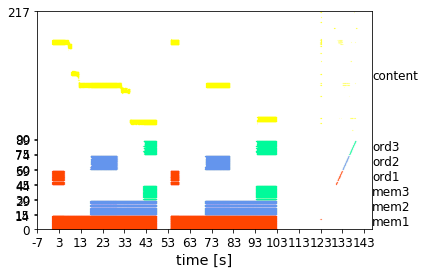

In [10]:
data = exp.df_rolls.copy()

#import mpld3
#mpld3.enable_notebook()
#
plot_populations(data,  {'ord1': '#ff4500', 'ord2': '#6495ed', 'ord3': '#00fa9a',
          
                         'mem1': '#ff4500', 'mem2': '#6495ed', 'mem3':'#00fa9a', 'content': '#ffff00'}, populations=populations)
plt.show()

In [11]:
#exp.df_rolls['population'].unique()


In [12]:
def print_row(exp, min_time=0, max_time=0, save=False):

    # if max_time is set, cut the data after this time
    data = exp.df_rolls.copy()

    fig = plt.figure(figsize=(20,10)) 
    gs = gridspec.GridSpec(1, 5) 
    gs.update(left=0.08, right=0.82, wspace=1)

    row_title_style = {
        'size': 'large',
        'weight': 'bold',
        'verticalalignment': 'center',
        'horizontalalignment': 'left',
        'rotation': 'vertical'
    }
    plot_populations(data,  {'ord1': '#4169E1', 'ord2': '#00CED1', 'ord3': '#00FFFF', 'mem1': '#4169E1', 'mem2': '#00CED1', 'mem3':'#00FFFF', 'content': '#FF00FF'}, populations=populations,min_time=min_time, max_time=max_time)
    plt.title('Neural Activity', **title_style)
    plt.ylabel('neuron', **label_style)

    plt.show()

    if save:
        raw_dir = plot_folder
        save_dir = raw_dir + exp.experiment_name
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        fig.savefig("{}/{}_spikes.pdf".format(save_dir, exp.experiment_name), dpi=90)
        fig.savefig("{}/{}_spikes.png".format(save_dir, exp.experiment_name))

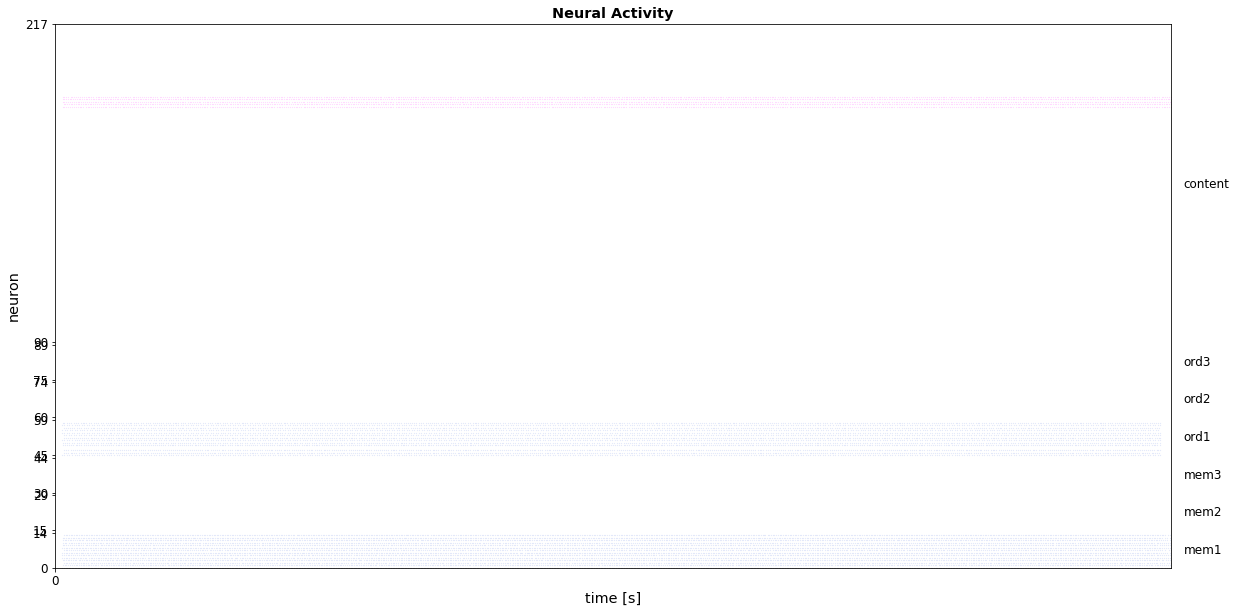

In [18]:
print_row(exp,save = False, min_time =0, max_time=9000)

In [18]:
plt.show()

In [ ]:
# print plastic synapses start neuron: zero, end_neuron 256 if you want to show all neurons, start_time: zero 
# if you start at time zero in the log file, sometimes you start at a later timepoint, 
# then you can indicate it here
def print_plastic(exp, start_neuron=0, end_neuron=256, save=False, start_time =0):

    # if max_time is set, cut the data after this time
    data = exp.df_rolls.copy()

    fig = plt.figure(figsize=(5,5)) 
    gs = gridspec.GridSpec(1, 5) 
    gs.update(left=0.08, right=0.82, wspace=1)

    row_title_style = {
        'size': 'large',
        'weight': 'bold',
        'verticalalignment': 'center',
        'horizontalalignment': 'left',
        'rotation': 'vertical'
    }

    timestamp = data['timestamp']
    neurons = data['neuron']
    neurons_filtered = []
    timestamp_filtered = []
    start = False
    for i in range(len(neurons)):
        if ( neurons[i] >= start_neuron and timestamp[i]>=start_time):
            start=True
        if (start==True and neurons[i]!=200 and neurons[i]!=112):
            neurons_filtered.append(neurons[i])
            timestamp_filtered.append(timestamp[i])
    plt.scatter(timestamp_filtered, neurons_filtered, s=1, color='red')
    plt.title('Readout plastic synapses', **title_style)
    plt.ylabel('neuron', **label_style)
    plt.xlabel('time(s)', **label_style)

    plt.show()

    if save:
        raw_dir = plot_folder
        save_dir = raw_dir + exp.experiment_name
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        fig.savefig("{}/{}_plastic.pdf".format(save_dir, exp.experiment_name), dpi=90)
        fig.savefig("{}/{}_plastic.png".format(save_dir, exp.experiment_name))

In [ ]:
print_plastic(exp, save=False, start_time= 280000)